# NLP and the Web: Home Exercise 2

## Task 0 ~ 0P

##### a) Please enter your group number

26

_**Regarding types, documentation, and output:**_

_We tried to make the description of the parameters as clear as possible. However, if you believe that something is missing, please reach out to us in Moodle. We provide type hints for the function parameters and return values of the functions that you have to implement. These are suggestions only, and you may use different types if you prefer._

_Nevertheless, your code must use the provided method stubs and parameters. Furthermore, make sure that your code runs without errors and in a reasonable amount of time, for example by using "Kernel/Restart & Run All" before submitting._

_Please use comments where appropriate to help the tutors understand your code. This is especially important for the more extensive exercises later on. Finally, please pay attention to how you output the results. We highly recommend using `display(df)` for displaying data frames._

_**Please only modify the template in the specified markdown and code cells (e.g. YOUR CODE / ANSWER / IMPORTS HERE). Some cells are left blank on purpose. Please do not modify these cells, because they are used to autograde your submission. If these cells are modified, the automatic grading for your submission will fail. Please do not modify the cells containing public and private tests. If you want to do your own tests, please use the code cell containing your code solution (YOUR CODE HERE).**_

# Imports

In [3]:
import numpy as np
from typing import Tuple, List
import numpy.typing as npt
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Task 1: Neural Network from scratch ~ 10P

**a) What is a Perceptron and what are the tasks of the 5 different components? (1P)**

Perceptron: an algorithm for supervised learning of binary classifiers(whether or not the input belongs to a class)


**b) Which activation functions do you know besides the ReLU (name at least 3) and explain the inputs / outputs of one of those? (1.5P)**

Softmax
Sigmoid sigmoid(x) = 1 / (1 + exp(-x))
tanh


**c) Implement the ReLU activation function and its derivative. (2P)**

*Note:* The ReLU (Rectified Linear Unit) function is a piecewise linear function which is very similar to the linear activation function that you know from lecture 2 page 30. The difference between these two is that ReLU cuts of the negative value and sets them to zero. $$\text{ReLU}(x) = \begin{cases} x, & \text{if } x > 0 \\ 0, & \text{if } x \le 0 \end{cases} $$

In [68]:
def relu(z: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    '''
    Input: 
        z: floating point vector to which you want to apply the ReLU activation function

    Output:
        Output a floating point vector that has the same shape as z but with the activated values
    '''
    # YOUR CODE HERE
    result=np.piecewise(z, [z <= 0, z > 0], [0, lambda x: x])
    return result

In [53]:
relu(np.array([1,-1]))

array([1, 0])

In [54]:
# These are some test cases for you to check your implementation
assert((relu(np.array([1,-1])) == np.array([1,0])).all())
assert((relu(np.array([-112,234])) == np.array([0,234])).all())

In [55]:
def grad_relu(z: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
    '''
    Input: 
        z: Vector to which you want to apply the gradient of the ReLU activation function

    Output:
        Output a vector that has the same shape as z and is the derivative of z
    '''
    # YOUR CODE HERE
    result=np.piecewise(z, [z <= 0, z > 0], [0, 1])
    return result


In [56]:
# These are some test cases for you to check your implementation
assert((grad_relu(np.array([1,-1])) == np.array([1,0])).all())
assert((grad_relu(np.array([-112,234])) == np.array([0,1])).all())

**d) Implement the forward function and the cost function and its gradient (2.5P).**

Implement the forward function for a neural network with one hidden layer.

*Hint:* You only need to use the activation function in the hidden layer.

In [106]:
def forward(X: npt.NDArray[np.float64], 
            Wh: npt.NDArray[np.float64], 
            Bh: npt.NDArray[np.float64], 
            Wo: npt.NDArray[np.float64], 
            Bo: npt.NDArray[np.float64]) -> Tuple[npt.NDArray[np.float64], 
                                                  npt.NDArray[np.float64], 
                                                  npt.NDArray[np.float64]]:
    ''' 
    This is the forward function for making predictions. 
    In order to train the network later you also need to return the activation and pre-activation of the hidden layer.
    
    Input:
        X: This is equivalent to the x in f(x). So to this value we want a prediction
        Wh: weight matrix or vector for the hidden layer
        Bh: bias for the hidden layer
        Wo: weight matrix for the output layer
        Bo: bias for the output layer

    Output:
        1. Prediction
        2. Activation of the hidden layer
        3. Pre-activation of the hidden layer
    '''
    # YOUR CODE HERE
    X=np.array(X)
    if len(X.shape)==0:
        X=[[X]]
    hiddenPreActivation= np.add(np.matmul(X, Wh),Bh)
    hiddenActivation: npt.NDArray[np.float64] = relu(hiddenPreActivation)
    pred: npt.NDArray[np.float64] = np.add(np.matmul(hiddenActivation, Wo),Bo)
    
    return pred,hiddenActivation,hiddenPreActivation

The cost function (also known as *loss*) is given as follows: $$\begin{align*} X &:= \text{Input for forward function}\\ y &:= \text{Correct label for } X \\ \text{forward}(X) &:= \text{Forward function that predicts a label for input } X\\ \text{The cost function:}\\ \text{cost}(X,y) &= \frac{\sum (\text{forward}(X)-y)^2}{2} \end{align*} $$

This is a slight variation of the one you already learned in the lecture but will do just fine.

In [99]:
def cost(X: npt.NDArray[np.float64], y: np.float64,
            Wh: npt.NDArray[np.float64], 
            Bh: npt.NDArray[np.float64], 
            Wo: npt.NDArray[np.float64], 
            Bo: npt.NDArray[np.float64]) -> np.float64:
    ''' 
    Quadratic loss function

    Input:
        X: Input for the value to predict
        y: real value for the prediction
        Wh: weight matrix or vector for the hidden layer
        Bh: bias for the hidden layer
        Wo: weight matrix for the output layer
        Bo: bias for the output layer

    Output:
        cost
    '''
    output=forward(X,Wh,Bh,Wo,Bo)[0]
    sum=0
    
    output=np.subtract(output,y)
    output=np.multiply(output,output)
    sum=np.sum(output)/2
    return sum
    # YOUR CODE HERE

In [18]:
def cost_grad(output: np.float64, y: np.float64) -> np.float64:
    ''' 
    Gradient of Quadratic loss function

    Input:
        output: predicted value
        y: real value for the output

    Output:
        gradient of cost
    '''
    # YOUR CODE HERE
    return output-y

Make yourself a clear image of what gradients are required and how they are calculated. We implemented the `backprop` function already for you.

In [100]:
def backprop(X: npt.NDArray[np.float64],
             output: npt.NDArray[np.float64],
             y: npt.NDArray[np.float64],
             Ah: npt.NDArray[np.float64],
             Zh: npt.NDArray[np.float64],
             Wo: npt.NDArray[np.float64]) -> Tuple[npt.NDArray[np.float64], 
                                                   npt.NDArray[np.float64], 
                                                   npt.NDArray[np.float64], 
                                                   npt.NDArray[np.float64]]:

    '''
    The backprop function should output the gradients to all the necessary vectors. 
     
    Input:
        X: This is equivalent to the x in f(x). So to this value we want a prediction
        output: Predicted value
        y: true value to X
        Ah: activation of hidden layer
        Zh: pre-activation of hidden layer
        Wo: weights of output layer

    Output:
        1. Gradients of weights of hidden layer
        2. Gradients of weights of output layer 
        3. Gradients of bias of hidden layer
        4. Gradients of bias of output layer
    '''
    err_output: np.float64 = cost_grad(output, y) #last layer is linear, no gradient needed
    err_hidden: npt.NDArray[np.float64] = np.dot(err_output, Wo.T) * grad_relu(Zh)

    # Weight Gradients
    dCdWh: npt.NDArray[np.float64] = np.dot(X, err_hidden)
    dCdWo: npt.NDArray[np.float64] = np.dot(Ah.T, err_output)
    
    # Bias Gradients
    dCdBh: npt.NDArray[np.float64] = np.sum(err_hidden, axis=0, keepdims=True)
    dCdBo: npt.NDArray[np.float64] = np.sum(err_output, axis=0, keepdims=True)

    return dCdWh, dCdWo, dCdBh, dCdBo

**e) Implement the training loop and train a simple function in the from of $f(x) = ax² + bx + c$ for example $f(x) = (x-5)^2$. But feel free to experiment and maybe try higher order functions too.**

For that you have to implement *gradient descent* to update the weights and performs one epoch of the training cycle and after that the training loop. (3P)

In [101]:
def gradient_descent(x: List[float], 
                     y: List[float],
                     lr: float, 
                     Wh: npt.NDArray[np.float64], 
                     Wo: npt.NDArray[np.float64], 
                     Bh: npt.NDArray[np.float64], 
                     Bo: npt.NDArray[np.float64]) -> Tuple[float, 
                                                           npt.NDArray[np.float64], 
                                                           npt.NDArray[np.float64], 
                                                           npt.NDArray[np.float64], 
                                                           npt.NDArray[np.float64]]:
    ''' 
    Gradient descent gets a list of inputs and true outputs and iterates trough 
    them and performs a weight and bias update each step. 

    Input:
        x: list of inputs in the same ordering as y
        y: list of true outputs with the same ordering as x
        lr: learning rate of gradient descent
        Wh: weight matrix or vector for the hidden layer
        Bh: bias for the hidden layer
        Wo: weight matrix for the output layer
        Bo: bias for the output layer
    
    Output:
        1. average of cost function of input data (TODO: check formulation)
        2. updated weights of hidden layer
        3. updated weights of output layer
        4. updated bias of hidden layer
        5. updated bias of output layer
    '''
    costAvage=0
    for X,Y in zip(x,y):
        prediction=forward(X,Wh,Bh,Wo,Bo)
        giadientValue=backprop(X,prediction[0],Y,prediction[1],prediction[2],Wo)
        Wh=np.subtract(Wh,lr*giadientValue[0])
        Wo=np.subtract(Wo,lr*giadientValue[1])
        Bh=np.subtract(Bh,lr*giadientValue[2])
        Bo=np.subtract(Bo,lr*giadientValue[3])
        costAvage+=cost(X,Y,Wh,Bh,Wo,Bo)
    costAvage/=len(x)
    
    # YOUR CODE HERE
    return costAvage,Wh,Wo,Bh,Bo

In [107]:
### Tests to check your implementation
inputLayerSize_t = 1
hiddenLayerSize_t = 5 # This is the value you can play around with
outputLayerSize_t = 1 

# Initialize Weights
Wh_t = np.ones((inputLayerSize_t, hiddenLayerSize_t)) 
Wo_t = np.ones((hiddenLayerSize_t, outputLayerSize_t))

# Initialize Biases
# Small positive value to avoid Relu units dying too quickly
Bh_t = np.full((1, hiddenLayerSize_t), 0.2)
Bo_t = np.full((1, outputLayerSize_t), 0.2)

# gradient_descent([1,2],[3,4], 0.001, Wh_t, Wo_t, Bh_t, Bo_t)

# Forward inputs and outputs
## Test 1
x_1 = [1,2,3]
y_1 = [3,2,1]
Wh_1 = Wh_t
Wo_1 = Wo_t
Bh_1 = Bh_t
Bo_1 = Bo_t

tmp_1 = gradient_descent(x_1,y_1, 0.001, Wh_1, Wo_1, Bh_1, Bo_1)

# for i in range(5):
#     print(np.round(tmp_1[i], 2))
assert(np.round(tmp_1[0], 2) == np.round(42.57, 2))
assert((np.round(tmp_1[1], 2) == np.round(np.array([[0.94, 0.94, 0.94, 0.94, 0.94]]), 2)).all())
assert((np.round(tmp_1[2], 2) == np.round(np.array([[0.93], [0.93], [0.93], [0.93], [0.93]]), 2)).all())
assert((np.round(tmp_1[3], 2) == np.round(np.array([[0.17, 0.17, 0.17, 0.17, 0.17]]), 2)).all())
assert((np.round(tmp_1[4], 2) == np.round(np.array([[0.17]]), 2)).all())

The following is the initialization of the weights and biases. So you get consistent results. Feel free to experiment with the number of neurons in the hidden layer. 

In [109]:
def init_network() -> Tuple[npt.NDArray[np.float64], npt.NDArray[np.float64], npt.NDArray[np.float64], npt.NDArray[np.float64]]:
    inputLayerSize: int = 1
    hiddenLayerSize: int = 10 # This is the value you can play around with
    outputLayerSize: int = 1 

    # Initialize Weights
    np.random.seed(0)
    Wh: npt.NDArray = np.random.randn(inputLayerSize, hiddenLayerSize) /np.sqrt(inputLayerSize)
    Wo: npt.NDArray = np.random.randn(hiddenLayerSize, outputLayerSize) /np.sqrt(hiddenLayerSize)

    # Initialize Biases
    # Small positive value to avoid Relu units dying too quickly
    Bh: npt.NDArray = np.full((1, hiddenLayerSize), 0.2)
    Bo: npt.NDArray = np.full((1, outputLayerSize), 0.2)

    return Wh, Wo, Bh, Bo

Next is the generation of the training data. Here you can also change up the function which the network should learn or the interval in which the numbers are generated. 

*Hint:* Start with an easy function an later aim for something more difficult.

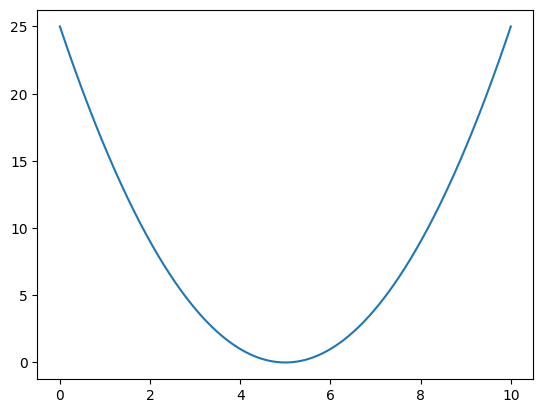

In [110]:
def f_x(x: float) -> float:
    '''
    Feel free to play around!
    '''
    # return 0.1 * ((x-5)**3 - 10 * x + 120) # Example of a more complex function
    return (x-5)**2

x = np.linspace(0, 10, 1001)
y = np.array([ f_x(i)  for i in x])

plt.plot(x,y)

Now implement the training loop and train your network for 1000 epochs with a learning rate of 0.001. Shuffle the training data before each epoch.

*Note:* The cost should go down if that is not the case check your code above. Are the derivatives correct?

*Hint:* In our test runs the cost at the end for $f(x) = (x-5)^2$ was most of the time below 0.05.

In [134]:
Wh, Wo, Bh, Bo = init_network()
np.random.seed(1024)
lost=[]
for i in range(1,1000):
    np.random.seed(0)
    x=np.random.random_sample(size=30)*10
    y=np.array([ f_x(i)  for i in x])
    tmp,Wj,Wo,Bh,Bo = gradient_descent(x,y, 0.001, Wh, Wo, Bh, Bo)
# YOUR CODE HERE


[6.47691231 9.9691358  5.18803264 6.58112731 5.99063472 7.53067334
 1.36247128 0.04117116 1.4950888  6.98439001 5.93352562 8.99915349
 4.44457392 3.16784996 9.23081759 4.6586186  7.98364577 1.99158707
 8.14519006 1.43474557 6.83485125 0.56615828 7.83675288 7.36566915
 7.70444353 1.86675709 0.49975371 8.8998114  1.73672906 7.73179356]
[2.83439518 6.55966831 9.8916562  2.7378929  4.18276385 7.74681358
 2.57452939 0.54239703 8.64714409 2.56953016 4.02268472 3.08131419
 9.7151223  5.76364554 2.69280074 8.72061546 0.78035593 7.67839105
 6.41673552 1.94118023 7.44875132 9.56318835 7.52493192 6.70025942
 5.94447211 1.89848095 4.27164371 8.12420372 7.58825425 7.10387171]
[1.03203291 8.35181396 4.98044518 5.42642344 4.95697544 4.65109685
 0.94200916 8.72981041 1.69710449 3.51377122 1.91557277 5.27217846
 9.05577917 2.7697716  7.2592271  7.77701364 0.11627644 8.47126793
 7.11254814 6.79234364 2.25725621 5.58894688 9.85629751 2.34998682
 8.01342131 1.0682046  6.96567396 1.41297921 2.87479499 9.75

Normally you also need test data in order to validate the accuracy of you network. But for now we only plot the predictions and the real values in the same plot so we can compare it.

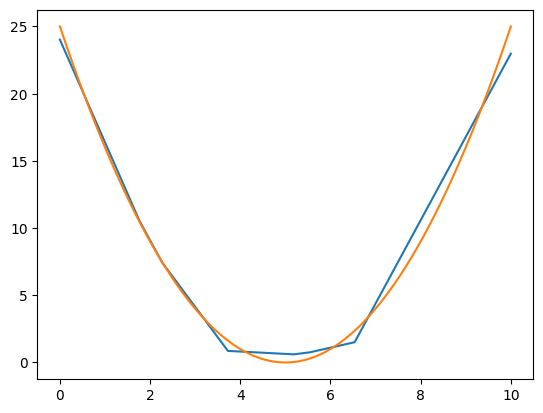

In [135]:
x_ax = np.linspace(0, 10, 1001)
y = np.array([ f_x(i)  for i in x_ax])
preds = np.array([forward(i, Wh, Bh, Wo, Bo)[0][0,0] for i in x_ax])
plt.plot(x_ax, preds)
plt.plot(x_ax,y)

## Task 2:  Occurrence and Intro to Spacy ~ 4P

As discussed in class, <b>spaCy</b> is a useful open-source library that enables the user to perform several NLP tasks with high-quality results. It is not only helpful for beginners in NLP but also for advanced programmers who want to integrate NLP features into real products.

For this exercise, you should only use spaCy; but you may use np and pandas if needed. Of course, you are also allowed to use the entire [Python Standard Library](https://docs.python.org/3.9/library/index.html). Please follow the instructions given below. In case of questions, use our Discussion forum in Moodle.

In [ ]:
# imports
from typing import List, Mapping
from spacy.tokens import Token
import numpy as np
import spacy

# download the language model if you haven't already (you may have to restart your Python kernel)
# spacy.cli.download("en_core_web_sm")

nlp = spacy.load('en_core_web_sm')

# this is a bit of a hacky patch for spaCy's missing handling of contractions (haven't, she'll, I'm) in version 3
# don't worry about it
nlp.get_pipe("attribute_ruler").add([[{"LOWER": "n't"}]], {"LEMMA": "not"})
nlp.get_pipe("attribute_ruler").add([[{"LOWER": "'ll"}]], {"LEMMA": "will"})
nlp.get_pipe("attribute_ruler").add([[{"LOWER": "'ve"}]], {"LEMMA": "have"})
nlp.get_pipe("attribute_ruler").add([[{"LOWER": "'m"}]], {"LEMMA": "be"})

### About the Corpus

In this exercise, you will work with a real dataset of public english-language tweets for the keyword 'lockdown' posted between Dec 14th and Dec 22nd 2020. It was originally collected for use in a psychological experiment investigating the public perception of covid lockdowns.  

Tweets were scraped from Twitter search results using the [snscrape](https://github.com/JustAnotherArchivist/snscrape) tool on Dec 22nd 2020. All links and @mentions were removed. The subset of the corpus you are working on has been further trimmed down to reduce spam and off-topic content present in the dataset.

---

To get started, you will have to read the dataset from the provided `tweets.txt` file. Each line in this file represents a single tweet. You will need to open and read the file before starting the other subtasks.

**Hint 1**: Depending on how you read the dataset, you may have to remove linebreaks from the end of the tweets. You can use the [`rstrip`](https://docs.python.org/3.9/library/stdtypes.html) function to do so.  
**Hint 2**: You may have to select 'utf-8' as the encoding when opening the file.  
**Hint 3**: For this task you have to use some spaCy functions. You can find some useful information about spaCy tokens and their attributes [here](https://spacy.io/api/token). 

**a) Tokenize each tweet in the dataset, then print the tokenized versions of the first five tweets ("token1", "token2", "token3"...). Use spaCy to solve this task. (1P)**

In [ ]:
results: List[str] = [] #put the tokenized tweets in this List
# YOUR CODE HERE
raise NotImplementedError()

**b) Implement the function `occurence_lowercase`. It shall calculate the (absolute) number of occurrences of each token that is in lowercase. Apply the function to our dataset of tweets and print the result (i.e. 'token: occurence') in descending order. Use spaCy to identify lowercased tokens. (1.5P)**

**Hint**: Do not lowercase all tokens, instead identify and count all already lowercased tokens. 

In [ ]:
from collections import Counter

def occurence_lowercase(data: List[List[Token]]) -> Mapping[str, int]:
    """
    Counts occurences of all lowercased tokens.
    The type hints are suggestions only. Feel free to use whatever works for you.
    
    @param data: array-like object containing tokenized tweets from subtask a)
    @return: array-like object with tokens and their counts
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# TODO: Print the result
# YOUR CODE HERE
raise NotImplementedError()

**c) Implement the function `occurence_no_punctuation`. It shall extract all tokens which occur exactly `five` times, excluding punctuation. Additionally it shall return the absolute occurence of these tokens similar to b). Apply the function to our dataset of tweets and print the result in descending order. Use spaCy to identify which tokens are considered to be punctuation. (1.5P)**

In [ ]:
def occurence_no_punctuation(data: List[List[Token]]) -> Mapping[str, int]:
    """
    Counts occurences of all tokens excluding punctuation and returns all with occurences greater or equal 5.
    The type hints are suggestions only. Feel free to use whatever works for you.
    
    @param data: array-like object containing tokenized tweets from subtask a)
    @return: array-like object with tokens and their counts
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# TODO: Print the result
# YOUR CODE HERE
raise NotImplementedError()

## Task 3: Matcher / Pattern finder ~ 6P

**a) Use the spaCy matcher to extract and print [proper nouns](https://en.wikipedia.org/wiki/Proper_and_common_nouns) that are longer than one token. Print each tweet from the dataset that contains at least one such proper noun together with all the matching proper nouns it contains. (2.5P)**

The output for a given tweet should look something like this:  
```
I live in New York City and I like Hot Dogs & Coke
    - New York City
    - Hot Dogs
```

**Hint 1**: If there is a proper noun like 'New York City' you should only print 'New York City' and not 'New York', 'New York City', and 'York City'. As in the previous task, you can quickly test different patterns using [explosion.ai/demos/matcher](https://explosion.ai/demos/matcher).

**Hint 2**: For this task you may have to use some functions that are not provided by spaCy.

**Hint 3**: You can check out [explosion.ai/demos/matcher](https://explosion.ai/demos/matcher) to play around with different patterns. You can also refer to the [spaCy documentation of the Token class](https://spacy.io/api/token) for interesting attributes and the [spaCy matching documentation](https://spacy.io/usage/rule-based-matching/) for info on how to create patterns.

*Sidenote: With the spaCy matcher you can do a lot more for example:*

**Example 1**: All tokens that describe a date or time. 'Let's meet this evening.' ==> *this evening*  
**Example 2**: Tokens describing appearance (e.g. adjectives after 'look'): 'It looks good.' ==> *looks good*

In [ ]:
from collections import defaultdict
from spacy.matcher import Matcher

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# TODO: print the result here
# YOUR CODE HERE
raise NotImplementedError()

**b) What methods do you know in order to get the common base form. What are advantages and disadvantages? (1P)**

YOUR ANSWER HERE

**c) Go over the entire dataset and find verbs and nouns (including proper nouns!) that share the same lemma. Print each lemma that is shared between at least one verb and one noun together with all distinct, lowercased, non-lemmatized nouns and verbs from the dataset that share that lemma. Every lemma should only be printed once. (2.5P)**

The output for the lemma 'walk' may look like this...
```
lemma: walk; nouns: walk; verbs: walk, walking, walked;
```
... assuming the dataset contains a sentence like 'We walked (V) the walk (N) and still walk (V) it today. Walking (V) brings us great joy.'

**Hint**: For this task you may need some functions which are not provided by spaCy. For example, you can join two dataframes and group strings by concatenating them. 

In [ ]:
lemma_dict = defaultdict(lambda: (set(), set()))
    
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# TODO: print the result here
# YOUR CODE HERE
raise NotImplementedError()

**Submission:**

Please upload your submission to Moodle before the next exercise session <font color="red">(Nov 30, 23:59pm)</font>!

Submission format: `Group_XX_Exercise_XX.zip`

Your submission should contain your filled out Jupyter notebook (naming schema: `Group_XX_Exercise_XX.ipynb`) and any auxiliar files that are necessary to run your code (e.g., the datasets provided by us).

Each submission must be handed in only once per group.